In [20]:
%matplotlib inline
import idx2numpy
import numpy as np
import cv2
from matplotlib import pyplot as plt
import random
import torch

In [36]:
file = 'data/train-images-idx3-ubyte'
images = idx2numpy.convert_from_file(file)

file = 'data/train-labels-idx1-ubyte'
labels = idx2numpy.convert_from_file(file)

## Data exporation

In [37]:
images.shape

(60000, 28, 28)

In [38]:
images[4].shape

(28, 28)

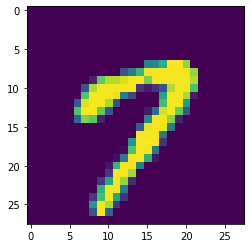

In [39]:
plt.imshow(images[15])
plt.show()

In [40]:
labels[15]

7

## Creating Dataset

In [41]:
train_size = 50000
val_size = 10000

train_idx = random.sample(range(images.shape[0]),train_size)
val_idx = list(set(range(images.shape[0])) - set(train_idx))

partition ={'train':train_idx,'validation':val_idx} 


In [43]:
class Dataset(torch.utils.data.Dataset):
    'Characterizes a dataset for PyTorch'
        
    def __init__(self, list_IDs, labels):
        'Initialization'
        self.labels = labels
        self.list_IDs = list_IDs

    def __len__(self):
        'Denotes the total number of samples'
        return len(self.list_IDs)

    def __getitem__(self, index):
        'Generates one sample of data'
        # Select sample
        ID = self.list_IDs[index]

        # Load data and get label
        #X = torch.load('data/' + ID + '.pt')
        X = images[ID]
        y = self.labels[ID]

        return X, y

## Creating Dataloader

In [44]:
# Parameters
params = {'batch_size': 64,
          'shuffle': True,
          'num_workers': 6}

# Generators
training_set = Dataset(partition['train'], labels)
training_generator = torch.utils.data.DataLoader(training_set, **params)

validation_set = Dataset(partition['validation'], labels)
validation_generator = torch.utils.data.DataLoader(validation_set, **params)

In [46]:
for local_batch, local_labels in training_generator:
    print (local_batch.shape)
    print (len(local_labels))

torch.Size([64, 28, 28])
64
torch.Size([64, 28, 28])
64
torch.Size([64, 28, 28])
64
torch.Size([64, 28, 28])
64
torch.Size([64, 28, 28])
64
torch.Size([64, 28, 28])
64
torch.Size([64, 28, 28])
64
torch.Size([64, 28, 28])
64
torch.Size([64, 28, 28])
64
torch.Size([64, 28, 28])
64
torch.Size([64, 28, 28])
64
torch.Size([64, 28, 28])
64
torch.Size([64, 28, 28])
64
torch.Size([64, 28, 28])
64
torch.Size([64, 28, 28])
64
torch.Size([64, 28, 28])
64
torch.Size([64, 28, 28])
64
torch.Size([64, 28, 28])
64
torch.Size([64, 28, 28])
64
torch.Size([64, 28, 28])
64
torch.Size([64, 28, 28])
64
torch.Size([64, 28, 28])
64
torch.Size([64, 28, 28])
64
torch.Size([64, 28, 28])
64
torch.Size([64, 28, 28])
64
torch.Size([64, 28, 28])
64
torch.Size([64, 28, 28])
64
torch.Size([64, 28, 28])
64
torch.Size([64, 28, 28])
64
torch.Size([64, 28, 28])
64
torch.Size([64, 28, 28])
64
torch.Size([64, 28, 28])
64
torch.Size([64, 28, 28])
64
torch.Size([64, 28, 28])
64
torch.Size([64, 28, 28])
64
torch.Size([64, 28, 